### Homework #3

In [3]:
import numpy as np 
import pandas as pd
import numpy as np
from sklearn import neighbors
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

#### Tokhirjon Malikov

#### Questions

##### Data Set

In [4]:
HPLearningSet = np.genfromtxt('HPLearningSet.txt', delimiter = ',', skip_header=1, usecols=(1,2,3,4))
HPLearningSet

OSError: HPLearningSet.txt not found.

####  1. If you had to eliminate one feature without compromising performance too much, which one would you pick, and why?

I would eliminate the Distance feature, because we can get a pretty accurate model by just considering Steallar Mass and Orbital Period.

#### 2. In class, we used k = 3 neighbors in the kNN algorithm. Would you recommend increasing the number of neighbors used in the classification for this data set? Why or why not? 

For this data set, increasing the number of neighbors wouldn't be too helpful, and it could consider certain planets as not habitable even if they are, due to proximity alone, and viceversa. Testing, the accuracy drops from 0.8 to 0.6 at 6 neighbors. For a small data saet like this one, increasing the number of neighbors is not always going to be benefitial.

#### 3. Assuming that the maximum Gini impurity is obtained when the objects are uniformly distributed among classes, figure out the maximum Gini impurity in a N-class classification problem. 

Maximum gini impurity would be 0.5 

#### 4. If you used the two decision trees obtained in the DT notebook, using the first 13 and last 13 objects as training set respectively, to classify the Earth as habitable or not habitable, what verdict would you obtain? (show your thought process!) What can you conclude from this result? 

For Earth, Orbital Period is 365, Stellar Mass and Distance is 1.

The first decision tree takes masses under 0.83 as not habitable, periods over 5 days as habitable. This tree would classify Earth as habitable

The second decision tree takes masses masses over 0.5, distance over 0.4AU and masses over 0.9 as non habitable. This tree would classify Earth as non habitable 

#### 5. Write pseudo-code (a sequence of operations, like the one we showed in class for DT) for the kNN algorithm.

### % To locate the similar neighbors we need a train row, a test row, and a number of neighbors
### % For this example we assume we have the rows needed for the algorithm

### % First step is to calculate the Euclidean distance
### %A for loop can do this for us

    ### distance = 0
    ### for i in range (length of TestRow - 1)
    ###         distance += ( TestRow - TrainRow) **2
    ### EuclideanDistance = sqrt(distance) 

### %Another for loop for the closest neighbors
    ### NumberNeighbors = this could be whatever we choose to 
    ### for i in range (NumberNeighbors)
    ###         ClosestNeighbors = NumberNeighbors.append(EuclideanDistance[i][0])

### %Let's predict classifications
    ### Values = [row[-1] for row in ClosestNeighbors]
    ### PredictionValues = max( set(Values), key = Values.count)

### %The kNN algorithm 
    ### kNNmodel = emptylist
    ### for row in  TestRow 
    ###         kNN = kNNmodel.append(PredictionValues)



## Coding exercises

#### For both the DT and kNN algorithms, check what happens to the test scores if you vary the training/test set size (for example, 16/2 and 11/10, but using more combinations won't hurt). Comment your results.

#### Re-do the kNN exercise using the "StandardScaler" option instead of the "RobustScaler". What happens to the test set accuracy and why? (suggestion: plot each point and their neighbors).

In [2]:
import matplotlib
font = {'size'   : 20}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

In [3]:
# Class notebook used as reference

In [4]:
#Import datafile (saved as a csv as well as a txt file)
HP_LearningSet = pd.read_csv('HPLearningSet.csv') 
#Trainig set is the first 13 elements 
HP_TrainSet =  HP_LearningSet.iloc[:13,:] 
#Test Set is the last 5 elements 
HP_TestSet = HP_LearningSet.iloc[13:,:]
#We get rid of the habitable and the name column since it is not needed 
Xtrain = HP_TrainSet.drop(['P_NAME','P_HABITABLE'], axis = 1)
Xtest = HP_TestSet.drop(['P_NAME','P_HABITABLE'], axis = 1)
#But we need the habitable and non habitable values 
ytrain = HP_TrainSet.P_HABITABLE
ytest = HP_TestSet.P_HABITABLE

Neighbor_Model = neighbors.KNeighborsClassifier(n_neighbors=3) #Number of neighbors is 3
Neighbor_Model
Xtrain.iloc[:,:2] 
Neighbor_Model.fit(Xtrain.iloc[:,:2],ytrain).predict(Xtest.iloc[:,:2]) 
metrics.accuracy_score(ytest, Neighbor_Model.predict(Xtest.iloc[:,:2]))
Neighbor_Model.kneighbors(Xtest.iloc[:,:2]) #the first element gives the distances, the second the index
    


(array([[ 0.26570661, 21.67033225, 39.73066574],
        [ 0.67416615,  2.76523055,  5.76302872],
        [ 7.28006181, 29.2       , 47.261296  ],
        [ 1.80227634,  2.87179386,  3.56      ],
        [ 7.93076289, 13.99022873, 32.05288443]]),
 array([[11, 10,  1],
        [ 4,  1,  2],
        [11, 10,  1],
        [ 2,  7,  4],
        [11, 10,  1]], dtype=int64))

In [5]:
# Use Standard Scaler instead of Robust Scaler
scaledData = sklearn.preprocessing.StandardScaler()

In [6]:
scaledData.fit(Xtrain)
scaledXTrain = scaledData.transform(Xtrain)
scaledXTrain
scaledXtest = scaledData.transform(Xtest)
Neighbor_Model.fit(scaledXTrain[:,:2],ytrain).predict(scaledXtest[:,:2])
Neighbor_Model.kneighbors(scaledXtest[:,:2]) #The distances SHOULD look more balanced


(array([[0.19795997, 0.25766196, 0.2676166 ],
        [0.26755522, 0.37410885, 0.65912194],
        [0.0895197 , 0.1012509 , 0.35776386],
        [0.01234429, 0.3441416 , 0.37288992],
        [0.23411258, 0.31611658, 0.58770053]]),
 array([[ 3, 11,  6],
        [10, 11, 12],
        [11, 10,  3],
        [ 4,  0,  1],
        [10, 11,  3]], dtype=int64))

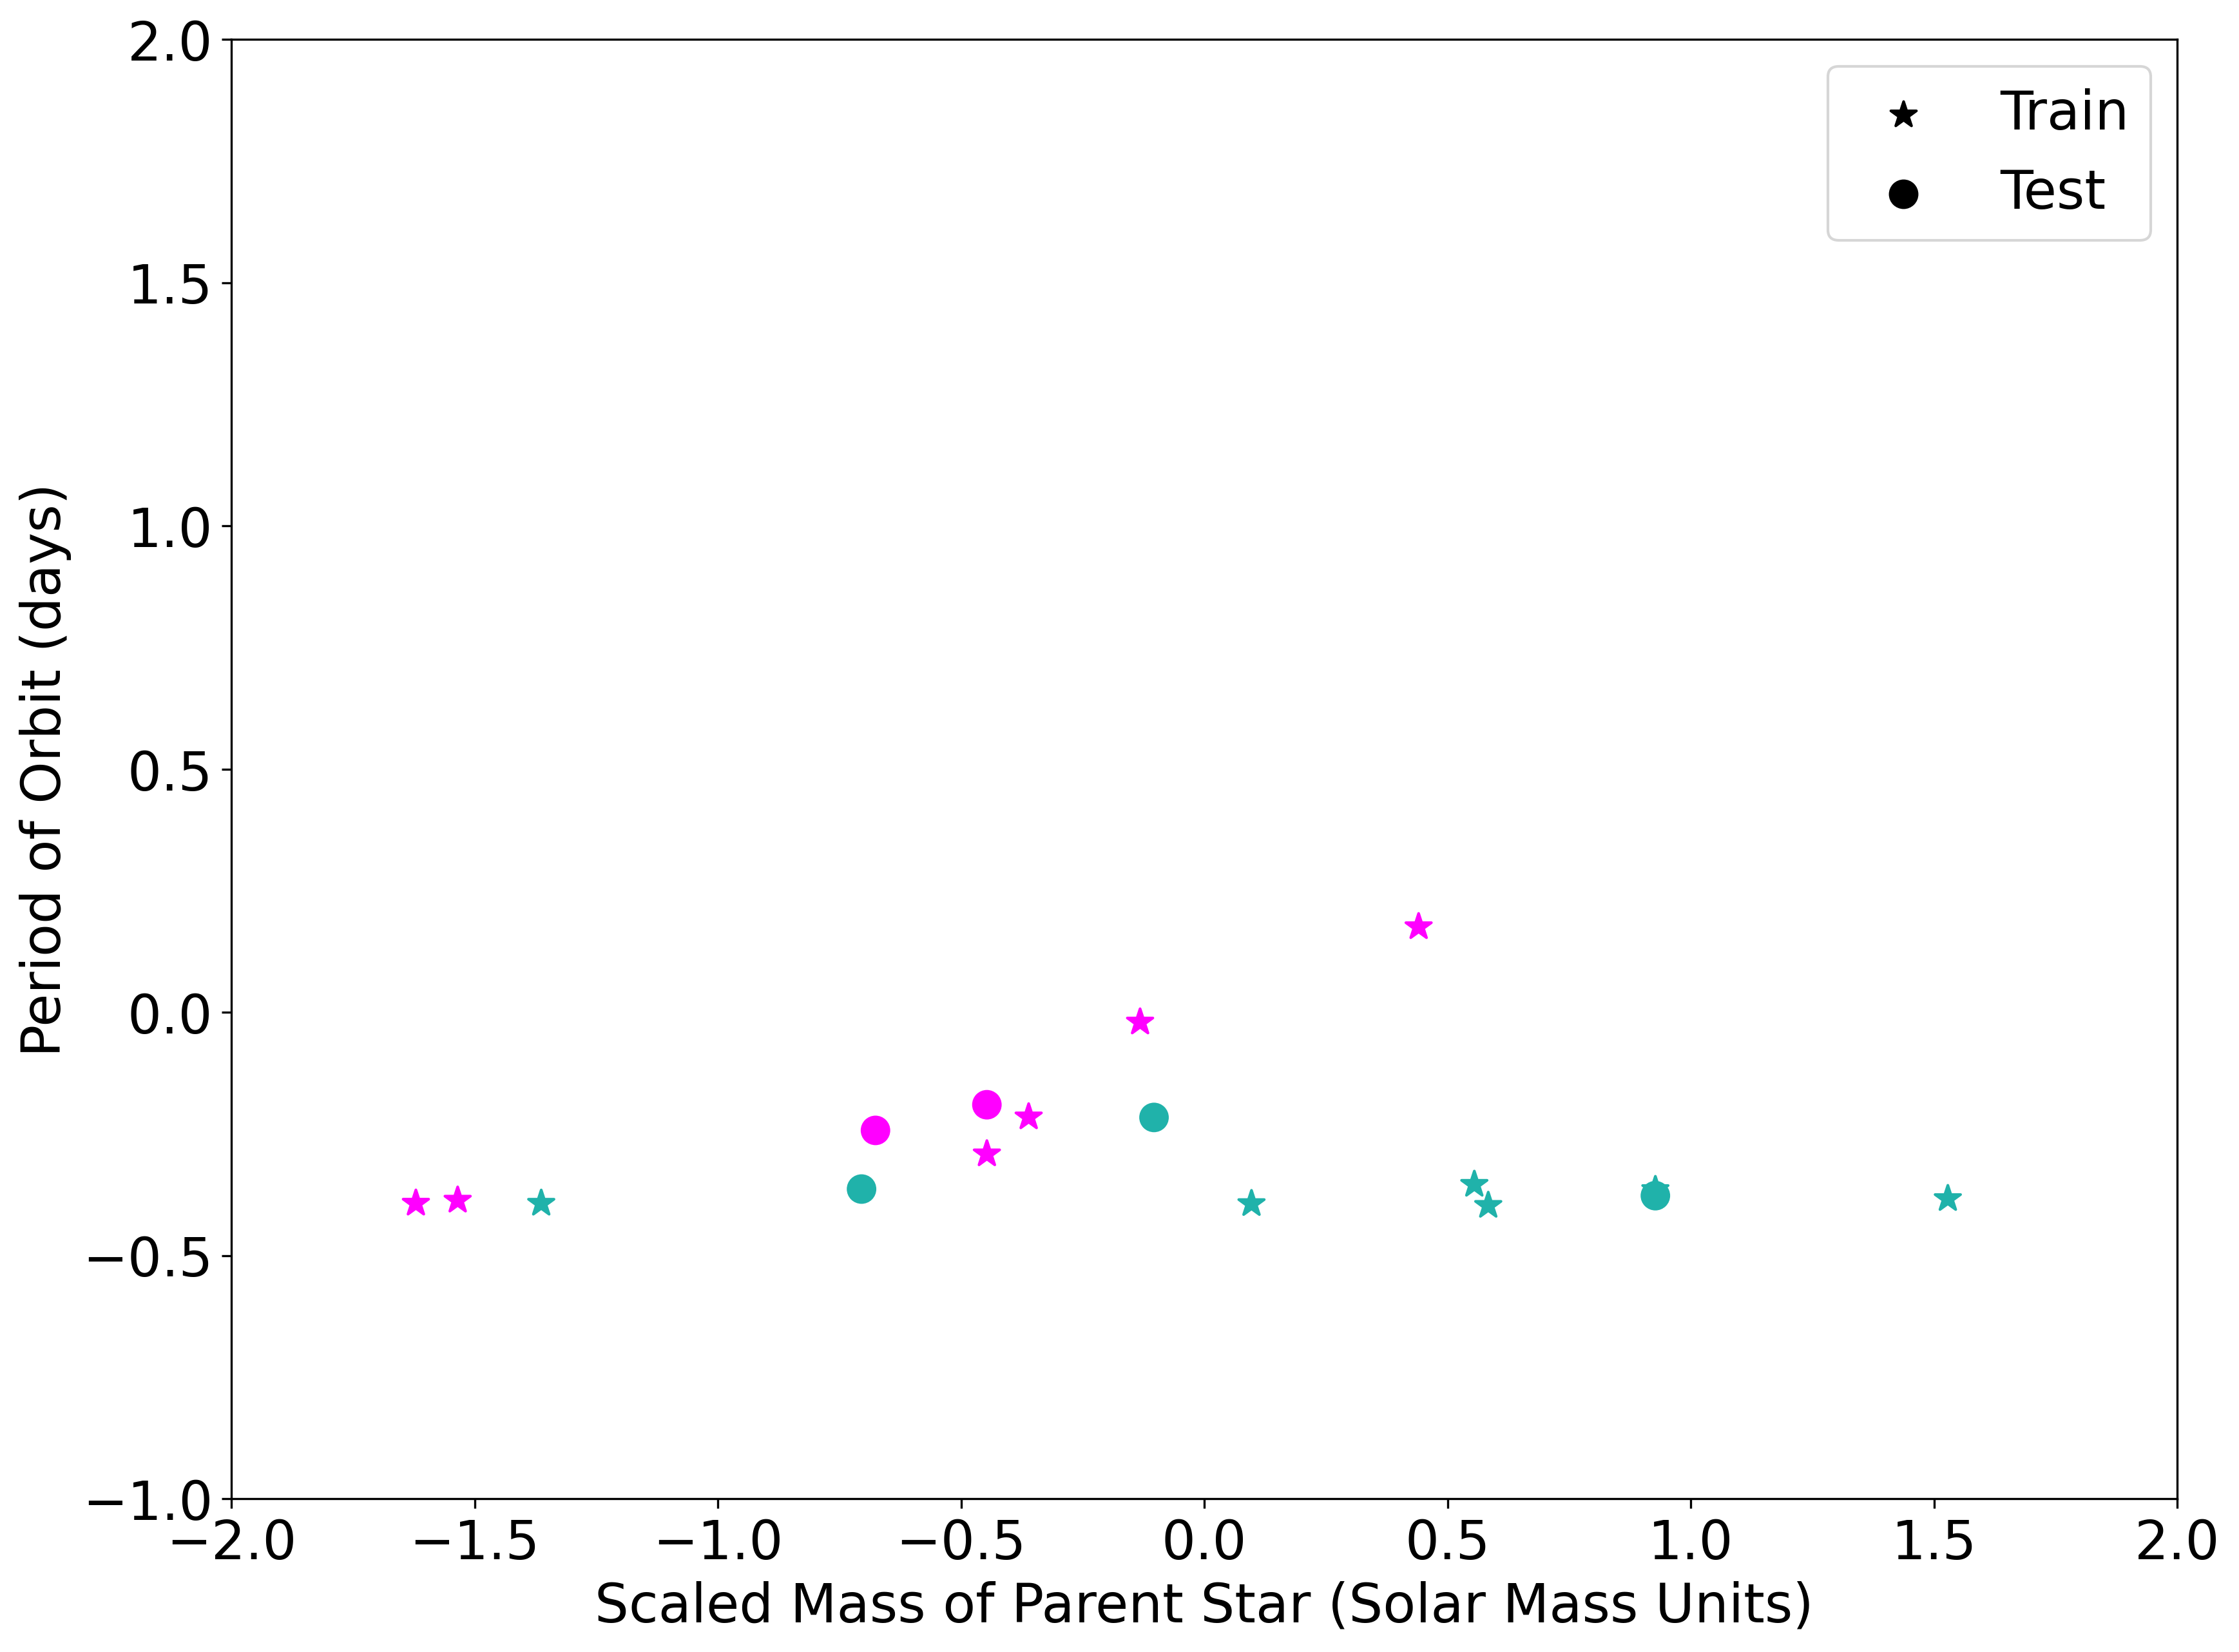

In [7]:
plt.figure(figsize=(15,10))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
plt.scatter(scaledXTrain[:,0], scaledXTrain[:,1], marker = '*',\
            c = ytrain, s = 100, label = 'Train', cmap=cmap) #, 
plt.scatter(scaledXtest[:,0], scaledXtest[:,1], marker = 'o',\
            c = ytest, s = 100, label = 'Test', cmap=cmap)
plt.gca().set_aspect(1)
plt.legend();
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
leg.legendHandles[1].set_color('k')
plt.xlabel('Scaled Mass of Parent Star (Solar Mass Units)')
plt.ylabel('Period of Orbit (days)');
plt.xlim(-2,2)
plt.ylim(-1.,2);


#### The standard scaler allows for the outliers to influence the mean, and this causes the rnage of the featires to ne reduced, as seen in the plot above, by keeping the periods so close to each other. Robust scaler does not let the outliers influence the range of the features significantly. By standard normally distributing the features, the accuracy increases when compared to the robust scaler, which uses a median range

## Here is the missing code from the first exercise

#### For both the DT and kNN algorithms, check what happens to the test scores if you vary the training/test set size (for example, 16/2 and 11/10, but using more combinations won't hurt). Comment your results.

In [8]:
HP_LearningSet

,P_NAME,S_MASS,P_PERIOD,Distance (AU),P_HABITABLE
0,Kepler-736 b,0.86,3.60,0.0437,0
1,Kepler-636 b,0.85,16.08,0.1180,0
2,Kepler-887 c,1.19,7.64,0.0804,0
3,Kepler-442 b,0.61,112.30,0.4093,1
4,Kepler-772 b,0.98,12.99,0.1074,0
5,Teegarden’s Star b,0.09,4.91,0.0252,1
6,K2-116 b,0.69,4.66,0.0481,0
7,GJ 1061 c,0.12,6.69,0.0350,1
8,HD 68402 b,1.12,1103.00,2.1810,0
9,Kepler-1544 b,0.81,168.81,0.5571,1


### First combination: 16/2

In [28]:
#Same block of code, just some minor changes and some variable renaming, kind of
HP_LearningSet
#Trainig set is the first 16 elements 
Diff_HP_TrainSet =  HP_LearningSet.iloc[:16,:] 
#Test Set is the last 2 elements 
Diff_HP_TestSet = HP_LearningSet.iloc[16:,:]
#We get rid of the habitable and the name column since it is not needed 
Diff_Xtrain = Diff_HP_TrainSet.drop(['P_NAME','P_HABITABLE'], axis = 1)
Diff_Xtest = Diff_HP_TestSet.drop(['P_NAME','P_HABITABLE'], axis = 1)
#But we need the habitable and non habitable values 
Diff_ytrain = Diff_HP_TrainSet.P_HABITABLE
Diff_ytest = Diff_HP_TestSet.P_HABITABLE

Diff_Neighbor_Model = neighbors.KNeighborsClassifier(n_neighbors=3) #Number of neighbors is 3
Diff_Neighbor_Model
Diff_Xtrain.iloc[:,:2] 
print(Diff_Neighbor_Model.fit(Diff_Xtrain.iloc[:,:2],Diff_ytrain).predict(Diff_Xtest.iloc[:,:2]) )
print(metrics.accuracy_score(Diff_ytest, Diff_Neighbor_Model.predict(Diff_Xtest.iloc[:,:2])))
Diff_Neighbor_Model.kneighbors(Diff_Xtest.iloc[:,:2]) 

[0 1]
1.0


(array([[ 1.80227634,  2.87179386,  3.56      ],
        [ 7.68260373,  7.93076289, 13.99022873]]),
 array([[ 2,  7,  4],
        [13, 11, 10]], dtype=int64))

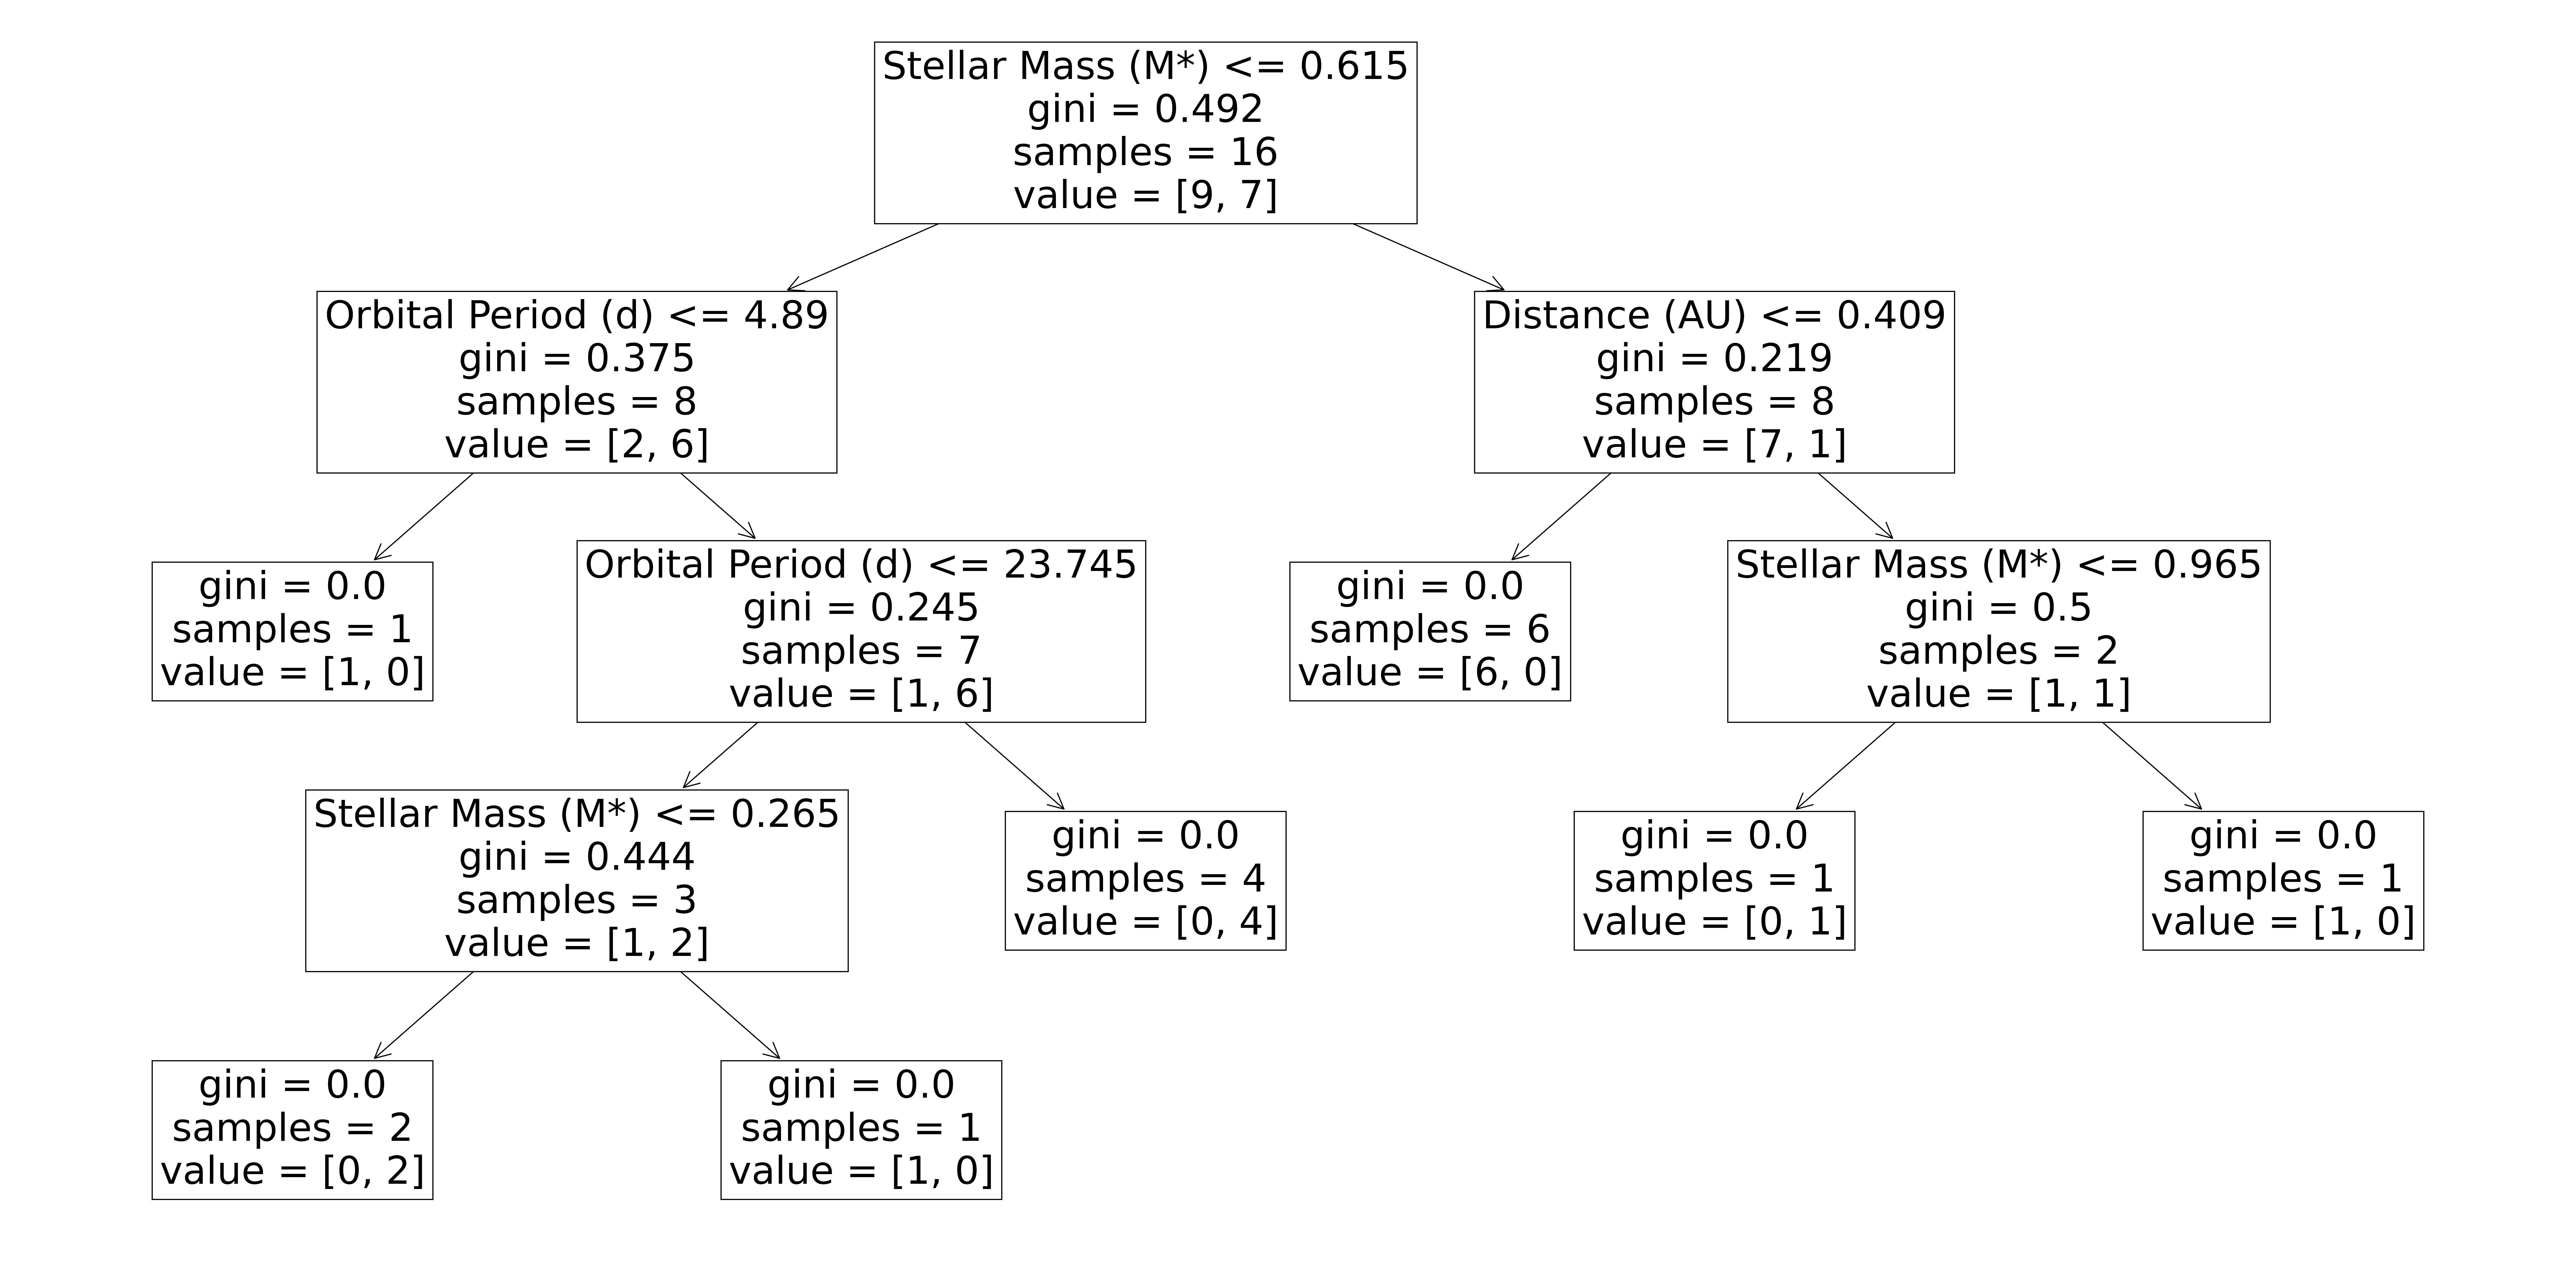

In [23]:
from sklearn import tree

Diff_model = DecisionTreeClassifier(random_state=3)

Diff_model.fit(Diff_Xtrain,Diff_ytrain)
plt.figure(figsize=(40,20))  # customize according to the size of your tree
tree.plot_tree(Diff_model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'])
plt.show()

## Second combination: 11/7

In [29]:
#Same block of code, just some minor changes and some variable renaming, again
HP_LearningSet
#Trainig set is the first 11 elements 
Second_HP_TrainSet =  HP_LearningSet.iloc[:11,:] 
#Test Set is the last 7 elements 
Second_HP_TestSet = HP_LearningSet.iloc[11:,:]
#We get rid of the habitable and the name column since it is not needed 
Second_Xtrain = Second_HP_TrainSet.drop(['P_NAME','P_HABITABLE'], axis = 1)
Second_Xtest = Second_HP_TestSet.drop(['P_NAME','P_HABITABLE'], axis = 1)
#But we need the habitable and non habitable values 
Second_ytrain = Second_HP_TrainSet.P_HABITABLE
Second_ytest = Second_HP_TestSet.P_HABITABLE

Second_Neighbor_Model = neighbors.KNeighborsClassifier(n_neighbors=3) #Number of neighbors is 3
Second_Neighbor_Model
Second_Xtrain.iloc[:,:2] 
print(Second_Neighbor_Model.fit(Second_Xtrain.iloc[:,:2],Second_ytrain).predict(Second_Xtest.iloc[:,:2]) )
print(metrics.accuracy_score(Second_ytest, Second_Neighbor_Model.predict(Second_Xtest.iloc[:,:2])))
Second_Neighbor_Model.kneighbors(Second_Xtest.iloc[:,:2]) 

[0 0 0 0 1 0 0]
0.7142857142857143


(array([[21.92002053, 39.98128062, 43.07235076],
        [ 0.09848858,  0.55154329,  1.44059016],
        [21.67033225, 39.73066574, 42.82151328],
        [ 0.67416615,  2.76523055,  5.76302872],
        [29.2       , 47.261296  , 48.96012357],
        [ 1.80227634,  2.87179386,  3.56      ],
        [13.99022873, 32.05288443, 35.14446187]]),
 array([[10,  1,  4],
        [ 5,  6,  0],
        [10,  1,  4],
        [ 4,  1,  2],
        [10,  1,  3],
        [ 2,  7,  4],
        [10,  1,  4]], dtype=int64))

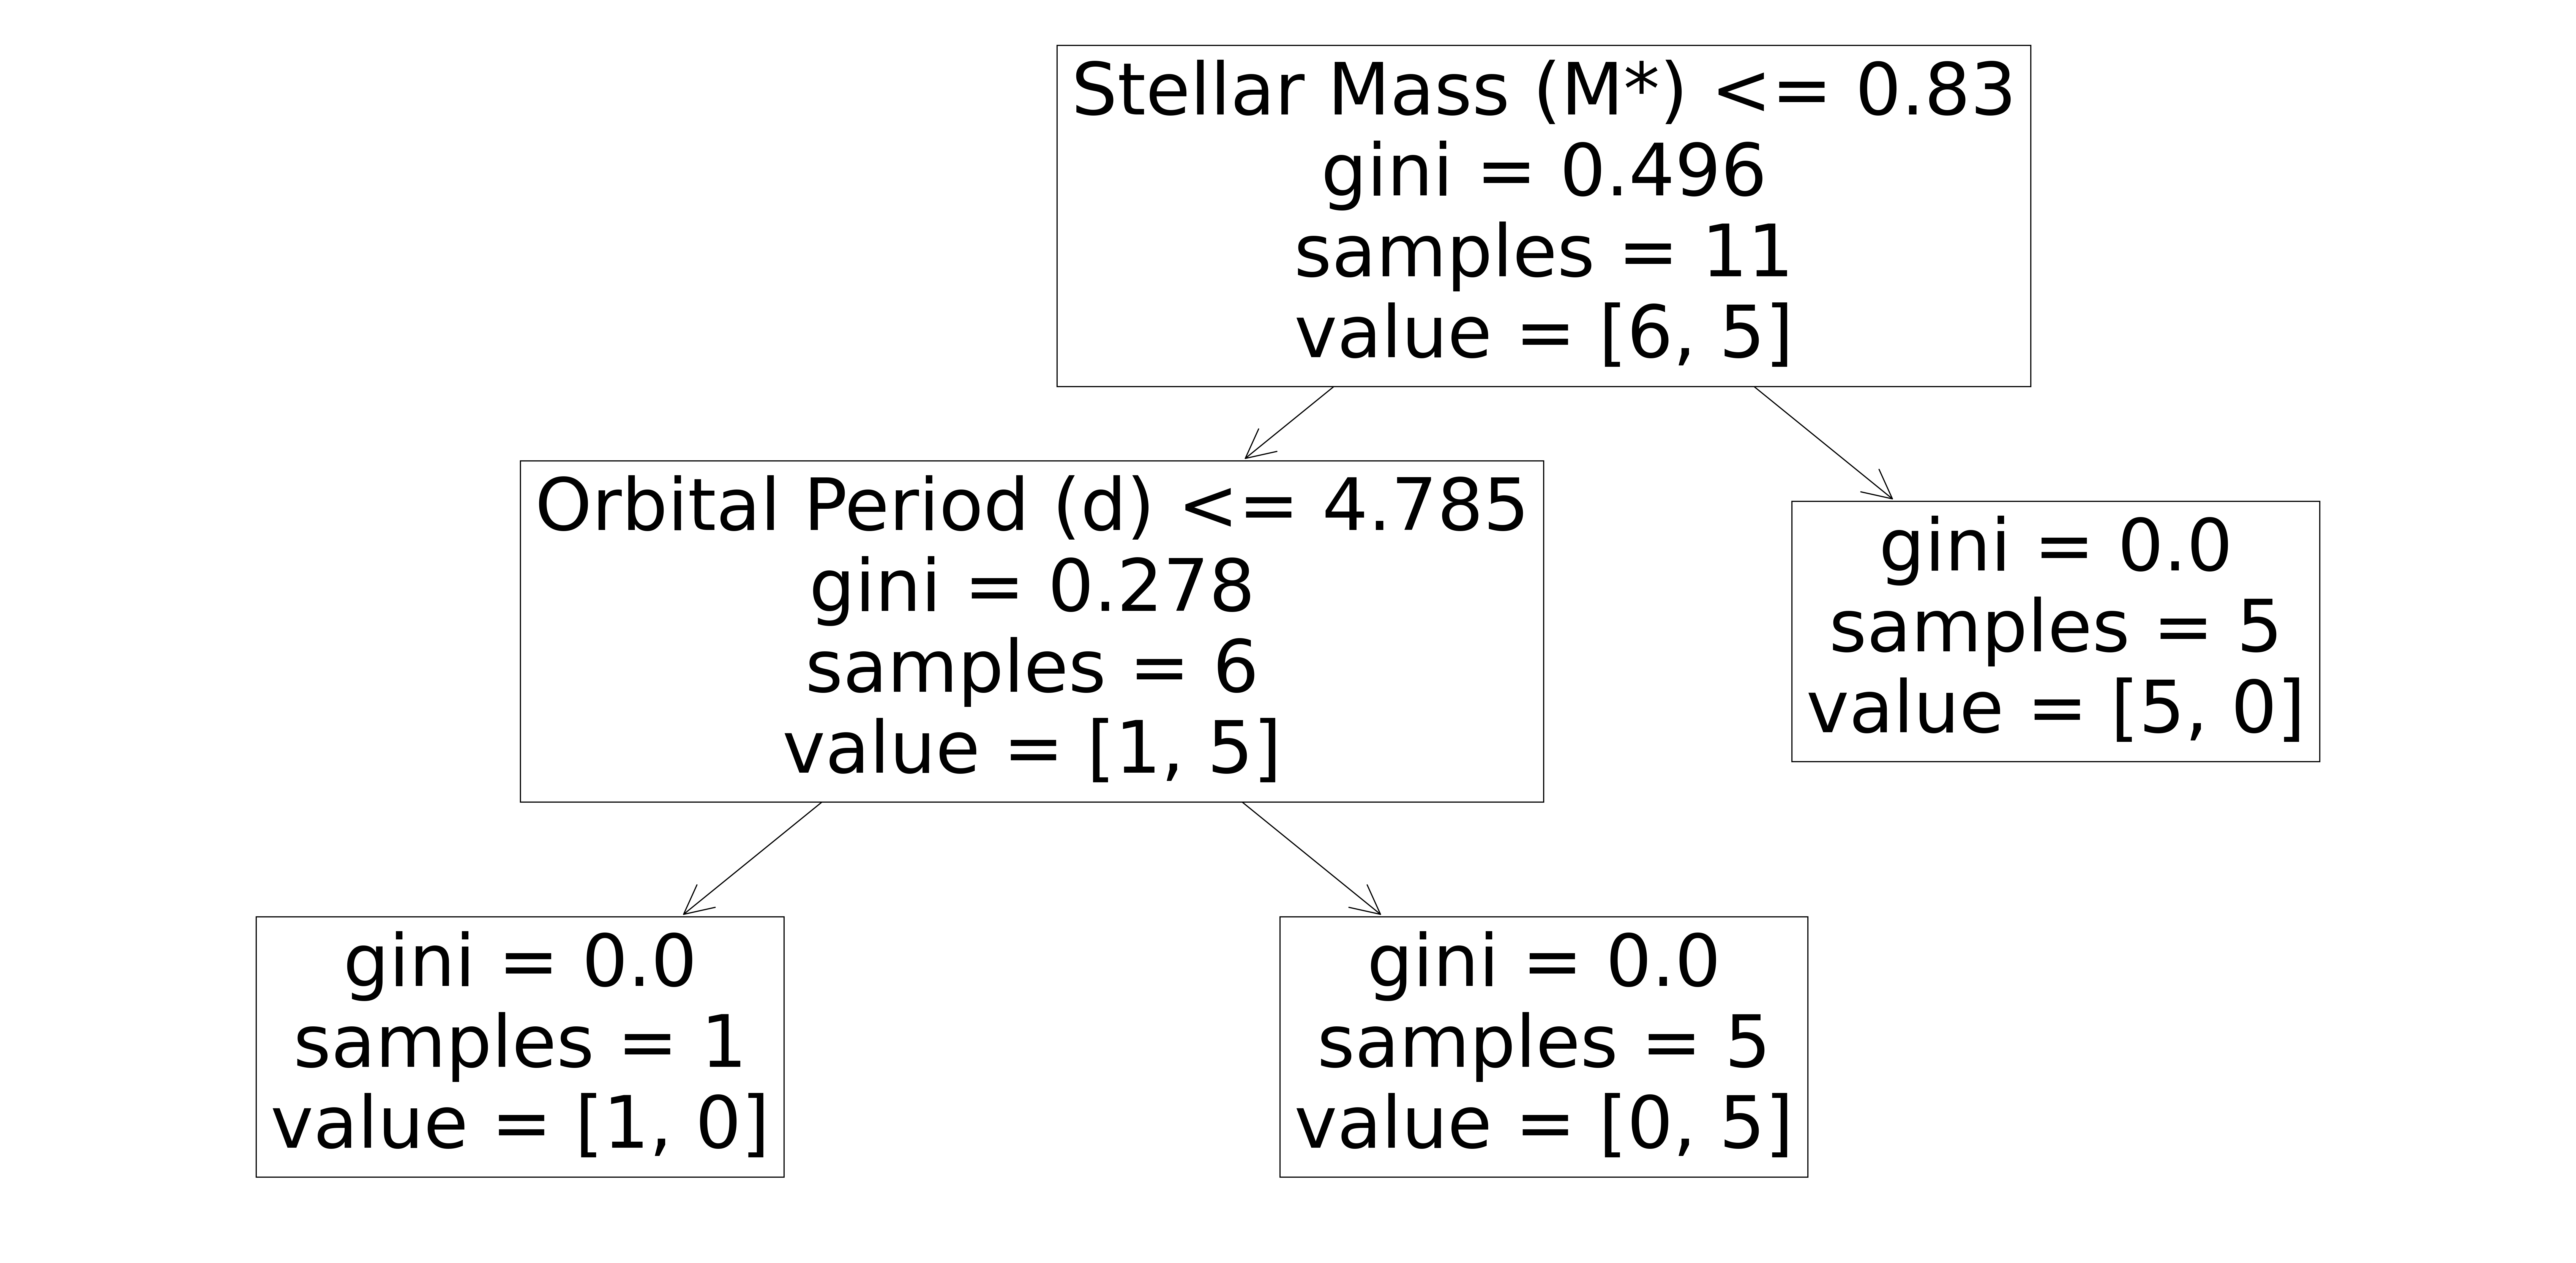

In [25]:
from sklearn import tree

Second_model = DecisionTreeClassifier(random_state=3)

Second_model.fit(Second_Xtrain,Second_ytrain)
plt.figure(figsize=(40,20))  
tree.plot_tree(Second_model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'])
plt.show()

### As we increase the size of the train set, accuracy improves, and the decision tree has to make more splits to arrive to a conclusion 
### Accuracy improves there is less data to sort through, which makes for a more accurate model but not necesarily a better one, since we could have done this by hand (for the 16/2) case